## IMPORTING DEPENDENCIES

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa, librosa.display

import tensorflow as tf 
from sklearn.model_selection import train_test_split

In [3]:
X_train = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/X_train.npy')
y_train = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/y_train.npy')
X_test = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/X_test.npy')
y_test = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/y_test.npy')
X_val = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/X_val.npy')
y_val = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/y_val.npy')

## NEURAL NETWORK MODEL

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
print(X_train[0].shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(98,) (16893, 2)
(2109, 98) (2109, 2)
(2088, 98) (2088, 2)


In [6]:
from tensorflow.keras import optimizers
model = Sequential()
model.add(Conv1D(32, 5, activation='relu', input_shape=(98,1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.Adam(amsgrad=True),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, validation_data= (X_val, y_val), epochs=120)
model.save("CNNModel-Model_Augmented-LFCC-Wavelet.h5")

Epoch 1/120
528/528 [==============================] - 14s 10ms/step - loss: 0.6582 - accuracy: 0.6016 - val_loss: 0.5884 - val_accuracy: 0.7088
Epoch 2/120
528/528 [==============================] - 3s 6ms/step - loss: 0.5516 - accuracy: 0.7287 - val_loss: 0.5460 - val_accuracy: 0.7423
Epoch 3/120
528/528 [==============================] - 3s 6ms/step - loss: 0.4735 - accuracy: 0.7870 - val_loss: 0.4367 - val_accuracy: 0.8003
Epoch 4/120
528/528 [==============================] - 3s 5ms/step - loss: 0.4069 - accuracy: 0.8210 - val_loss: 0.3835 - val_accuracy: 0.8242
Epoch 5/120
528/528 [==============================] - 3s 5ms/step - loss: 0.3604 - accuracy: 0.8448 - val_loss: 0.3527 - val_accuracy: 0.8357
Epoch 6/120
528/528 [==============================] - 3s 5ms/step - loss: 0.3220 - accuracy: 0.8615 - val_loss: 0.3406 - val_accuracy: 0.8520
Epoch 7/120
528/528 [==============================] - 4s 7ms/step - loss: 0.2877 - accuracy: 0.8766 - val_loss: 0.3196 - val_accuracy: 0.86

In [7]:
print("Model Score: \n")
score = model.evaluate(X_test, y_test)
print(score)

Model Score: 

66/66 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.9379
[0.4166993200778961, 0.9378852248191833]


In [ ]:
pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 KB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9472 sha256=330faca6746b234d92a25957f1d56fe7365bf9cbf4b9ad749c106eaa9dfb4b91
  Stored in directory: /root/.cache/pip/wheels/97/a5/76/35ae3e15da1ce4530de8591b0bcd7716f6d6752a4808f01c04
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.50-py3-none-any.whl size=320514 sha256=b92d3e6775e75b99625033b6d0abfdb1889daf41aaf615f7ee93eaf956de3eaa
  Stored in directory: /root/.cache/pip/wheels/a3/5f/ba/ddd191edb6c749a63cffabd28714d5600b5b58014daf7434a8
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl siz

(<Figure size 1000x500 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

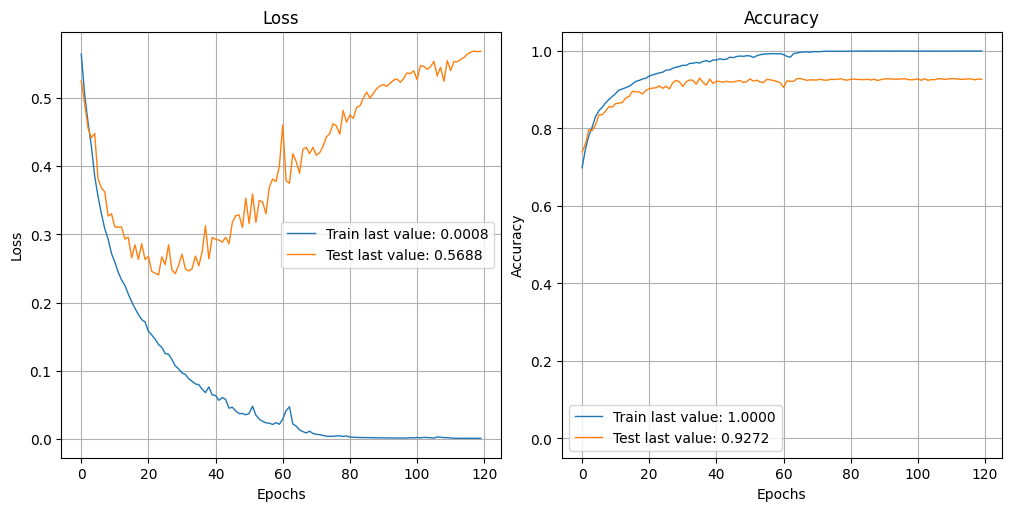

In [ ]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt
plot_history(history)

In [ ]:
import matplotlib.pyplot as plt
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Model Classification Report: 

66/66 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1049
           1       0.93      0.93      0.93      1060

    accuracy                           0.93      2109
   macro avg       0.93      0.93      0.93      2109
weighted avg       0.93      0.93      0.93      2109

Confusion matrix, without normalization
[[976  73]
 [ 71 989]]


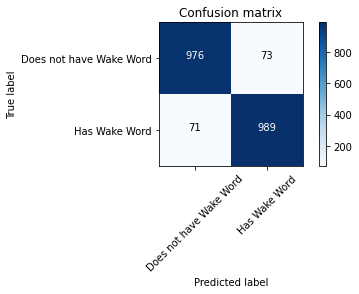

In [ ]:
print("Model Classification Report: \n")
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(classification_report(np.argmax(y_test, axis=1), y_pred))
plot_confusion_matrix(cm, classes=["Does not have Wake Word", "Has Wake Word"])